1. Read the Bike Details dataset into a Pandas DataFrame and display its 
first 10 rows.

In [20]:
import pandas as pd

file = "BIKE DETAILS.csv"
bike_df = pd.read_csv(file)

print(bike_df.head(10))

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

2. Check for missing values in all columns and describe your approach for 
handling them.

In [21]:
#First check for missing values.

print(bike_df.isnull().sum())

#Since it's a numerical price column and likely skewed, using the median of 'ex_showroom_price' to fill the missing values

bike_df['ex_showroom_price'].fillna(bike_df['ex_showroom_price'].median(), inplace=True)
print(bike_df)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda

C:\Users\NND_CYBERKP\AppData\Local\Temp\ipykernel_11620\817483871.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bike_df['ex_showroom_price'].fillna(bike_df['ex_showroom_price'].median(), inplace=True)


3. Plot the distribution of selling prices using a histogram and describe the 
overall trend.

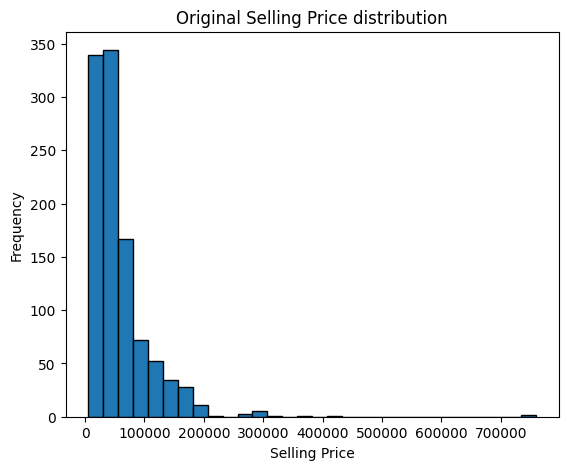

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(bike_df['selling_price'], bins=30, edgecolor= "black")
plt.title("Original Selling Price distribution")
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

Observation:
1. The distribution is right skewed or positively skewed.
2. Most bikes are sold at lower price ranges.
3. A very few bikes have very high selling price. which acts as outliers.
4. Majority of bikes in dataset are affordable models, while only small fractions are premium or high end bikes.

4. Create a bar plot to visualize the average selling price for each seller_type 
and write one observation.

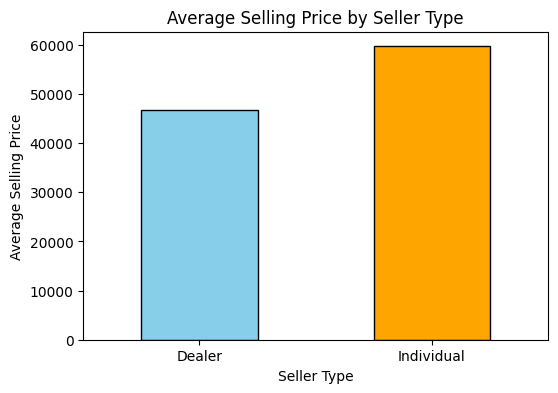

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [23]:
avg_price_by_seller = bike_df.groupby('seller_type')['selling_price'].mean()
avg_price_by_seller

plt.figure(figsize= (6,4))
avg_price_by_seller.plot(kind = 'bar', color= ['skyblue','orange','green'], edgecolor = 'black')
plt.title("Average Selling Price by Seller Type")
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.show()

print(avg_price_by_seller)

Obsevation:
1. Individuals has higher average selling price around 60,000/-
2. Dealer has lower average selling price around 47,000/-

5.  Compute the average km_driven for each ownership type (1st owner, 
2nd owner, etc.), and present the result as a bar plot. 

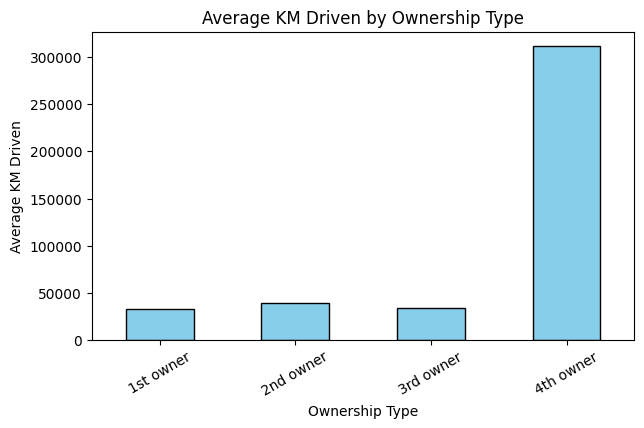

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [24]:
avg_km_by_owner = bike_df.groupby('owner')['km_driven'].mean()

# Plot bar chart
plt.figure(figsize=(7,4))
avg_km_by_owner.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average KM Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average KM Driven")
plt.xticks(rotation=30)
plt.show()

print(avg_km_by_owner)


6. Use the IQR method to detect and remove outliers from the km_driven 
column. Show before-and-after summary statistics. 

In [25]:
print("Before removing outliers:\n")
print(bike_df['km_driven'].describe())

Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = bike_df[(bike_df['km_driven'] >= lower_bound) & (bike_df['km_driven'] <= upper_bound)]

print("\nAfter removing outliers:\n")
print(df_no_outliers['km_driven'].describe())


Before removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


7. Create a scatter plot of year vs. selling_price to explore the 
relationship between a bike's age and its price.

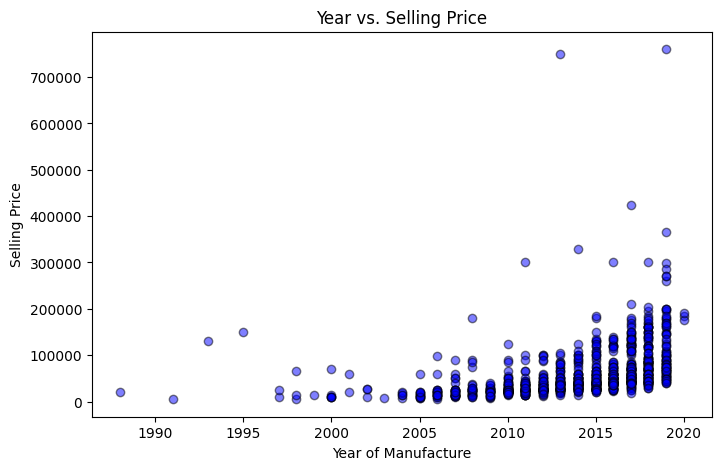

In [26]:
plt.figure(figsize= (8,5))
plt.scatter(bike_df['year'], bike_df['selling_price'], alpha=0.5, c='blue', edgecolors='k')
plt.title("Year vs. Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()

8. Convert the seller_type column into numeric format using one-hot 
encoding. Display the first 5 rows of the resulting DataFrame. 

In [29]:
encoded = pd.get_dummies(bike_df, columns=['seller_type'], drop_first=False, dtype=int)

print(encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350            72752.5                   0                       1  
1       5650            72752.5                   0                       1  
2      12000           148114.0                   0                       1  
3      23000            89643.0                   0                       1  
4      21000            72752.5                   0                       1  


9. Generate a heatmap of the correlation matrix for all numeric columns. 
What correlations stand out the most? 

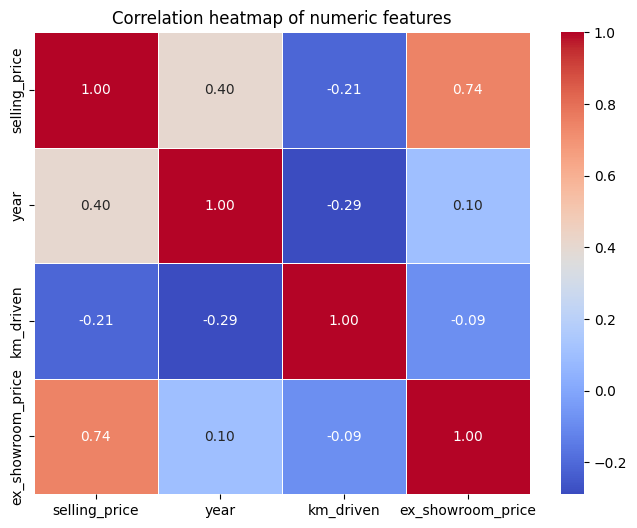

In [31]:
import seaborn as sns

numeric_df = bike_df.select_dtypes(include=['int64','float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation heatmap of numeric features")
plt.show()

10. Question 10: Summarize your findings in a brief report: 

● What are the most important factors affecting a bike's selling price? 

● Mention any data cleaning or feature engineering you performed.

Bike selling price analysis report.

Key factors:
1. Newer bikes (higher year) tend to have higher selling prices.
2. Scatter plot showed a clear upward trend between year and selling_price.
3. Strong positive correlation with selling_price. Bikes with higher original showroom prices retain higher resale value.
4. Negative correlation with selling price. Higher mileage reduces resale value since it indicates more wear and tear.
5. In this dataset, Individuals had higher average selling prices than Dealers. This suggests individuals are selling more premium or expensive bikes compared to dealer listings.
6. Average km_driven increases with ownership count. Higher ownership (3rd or 4th owner) is associated with lower resale prices.

Data Cleaning & Feature engineering perfomed.
1. Found missing values in ex_showroom_price. Decided on imputation using median (since it’s skewed).
2. Used IQR method to remove extreme outliers in km_driven. This helped bring distributions into a more realistic range.


Missing Values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64 

Before removing outliers:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64 

After removing outliers:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64 

Encoded DataFrame (first 5 rows):
                                   name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  

C:\Users\NND_CYBERKP\AppData\Local\Temp\ipykernel_11620\4102647589.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)


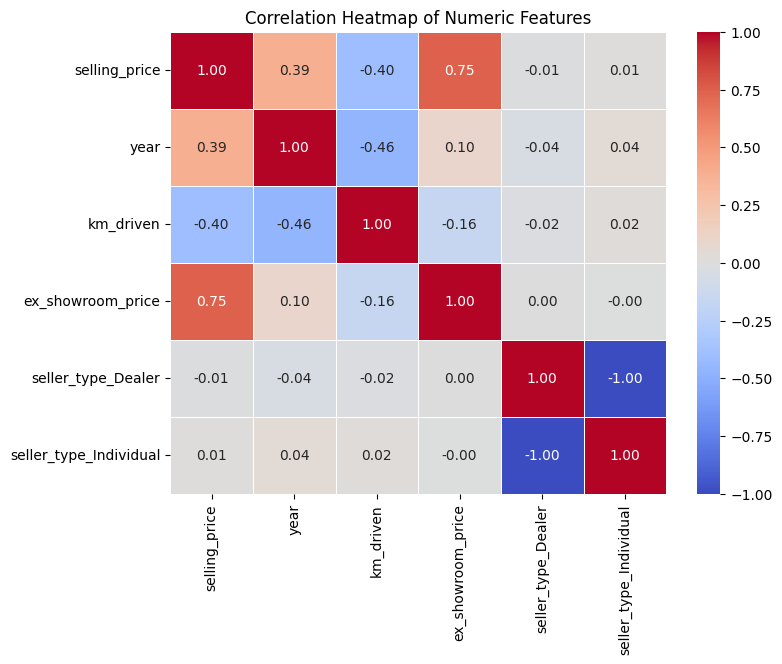

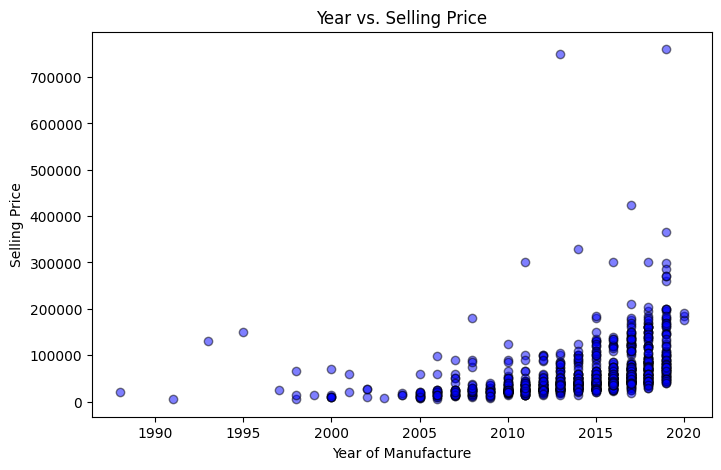

Average Selling Price by Seller Type:
 seller_type
Dealer        51000.000000
Individual    60858.397247
Name: selling_price, dtype: float64 



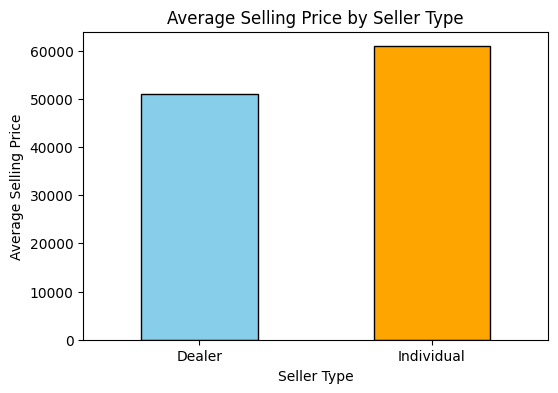

Average KM Driven by Ownership Type:
 owner
1st owner    27396.447309
2nd owner    33893.555556
3rd owner    33292.181818
4th owner    27250.000000
Name: km_driven, dtype: float64 



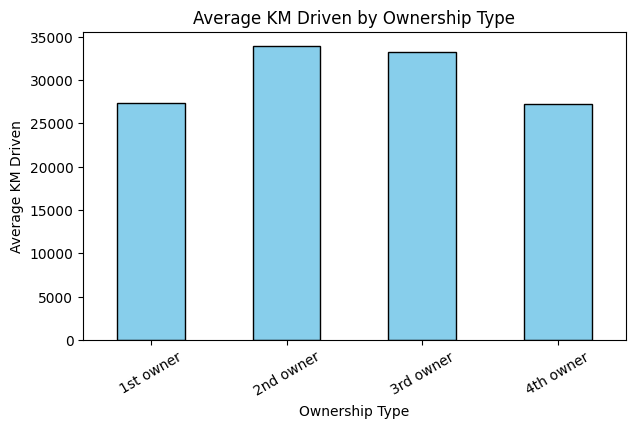

🔑 Findings Summary:
1. Selling price is strongly correlated with ex-showroom price.
2. Newer bikes (higher year) have higher selling prices.
3. Higher km_driven reduces resale value.
4. Individuals in this dataset sold bikes at higher average prices than dealers.
5. More ownership transfers generally mean higher km_driven and lower resale price.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")

# 1. Missing Values Check
print("Missing Values:\n", df.isnull().sum(), "\n")

# Impute missing ex_showroom_price with median
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)


# 2. Outlier Removal (km_driven using IQR)
print("Before removing outliers:\n", df['km_driven'].describe(), "\n")

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("After removing outliers:\n", df['km_driven'].describe(), "\n")


# 3. Encoding seller_type
df_encoded = pd.get_dummies(df, columns=['seller_type'], dtype=int)
print("Encoded DataFrame (first 5 rows):\n", df_encoded.head(), "\n")


# 4. Correlation Heatmap

numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# 5. Scatter Plot: Year vs Selling Price
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.5, c='blue', edgecolors='k')
plt.title("Year vs. Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()


# 6. Bar Plot: Average Selling Price by Seller Type
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean()
print("Average Selling Price by Seller Type:\n", avg_price_by_seller, "\n")

plt.figure(figsize=(6,4))
avg_price_by_seller.plot(kind='bar', color=['skyblue','orange','green'], edgecolor='black')
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=0)
plt.show()


# 7. Bar Plot: Average KM Driven by Ownership Type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average KM Driven by Ownership Type:\n", avg_km_by_owner, "\n")

plt.figure(figsize=(7,4))
avg_km_by_owner.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average KM Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average KM Driven")
plt.xticks(rotation=30)
plt.show()

# 9. Findings Summary
print("🔑 Findings Summary:")
print("1. Selling price is strongly correlated with ex-showroom price.")
print("2. Newer bikes (higher year) have higher selling prices.")
print("3. Higher km_driven reduces resale value.")
print("4. Individuals in this dataset sold bikes at higher average prices than dealers.")
print("5. More ownership transfers generally mean higher km_driven and lower resale price.")
